# This notebook
 * Calculates residual lensing amplitude forecasts for MAP

In [ ]:
import numpy as np
import healpy as hp
import os, sys
from astropy.io import fits
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.gridspec as gridspec

import component_separation.MSC.MSC.pospace as ps

from lerepi.config.cmbs4.data import data_08d as sims_if
sims  = sims_if.ILC_May2022('00')

simids = np.array([0])
nside = 2048
lmax = 2047
lmax_plot = lmax

ll = np.arange(0,lmax_plot+1,1)
binspace = 5
scale_uk = (2 * ll + 1) * ll**2 * (ll + 1)**2
scale_ps = ll*(ll+1)/(2*np.pi)
label_scale_ps = r'$\frac{\ell(\ell+1)}{2 \pi}$'
label_scale_lp = r'$\frac{\ell^2(\ell+1)^2}{2 \pi}$'
scale_lp = ll**2 * (ll + 1)**2 * 1e7 / (2 * np.pi)

psl = r'$\frac{l(l+1)}{2\pi}C_\ell \/ [\mu K^2]$'

MSC: reverting to standard healpy


In [ ]:
def bandpass_alms(alms, lmin, lmax=None):
    """
    lmin: minimum multipole to keep in alms
    lmax: maximimum multipole to keep in alms
    """
    
    if len(alms) == 3:
        out = np.zeros(alms.shape, dtype=complex)
        for idx, _alms in enumerate(alms):
            out[idx] = bandpass_alms(_alms, lmin, lmax=lmax)
        return out
    
    lmax_in_alms = hp.Alm.getlmax(len(alms))
    if lmax is None:
        lmax = lmax_in_alms
    else:
        assert isinstance(lmax, int), "lmax should be int: {}".format(lmax)
        assert lmax <= lmax_in_alms, "lmax exceeds lmax in alms: {} > {}".format(lmax, lmax_in_alms)
    
    fl = np.zeros(lmax_in_alms + 1, dtype=float)
    fl[lmin:lmax+1] = 1
    
    return hp.almxfl(alms, fl)

In [ ]:
matplotlib.rcParams.update({'font.size': 18})
cls_path = opj(os.path.dirname(plancklens.__file__), 'data', 'cls')
cls_unl = utils.camb_clfile(opj(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
cls_len = utils.camb_clfile(opj(cls_path, 'FFP10_wdipole_lensedCls.dat'))
itmax = 5
nO_iter = n0s.get_N0_iter('p_p', 0.59/np.sqrt(2), 0.7, 2.3, cls_unl, 2, 3000, itmax, None, 4000, ret_delcls=True)

 [00:02:48]  --------> 83%


/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/s/sebibel/.conda/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, '$A_\\ell$')

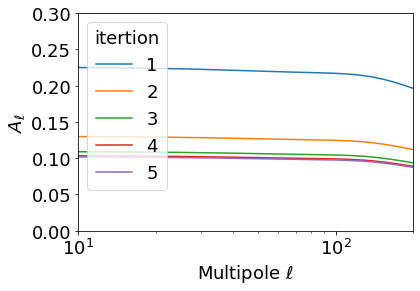

In [56]:
for n in range(1,len(nO_iter[-1])):
    plt.plot(nO_iter[-2][n]['bb'][:6901]/cls_len['bb'], label=n)
    # plt.plot(nO_iter[-2][n]['bb'][:6901])
# plt.plot(cls_len['bb'])
    # plt.plot(nO_iter[-2][n]['bb'])
plt.xlim(10,200)
plt.xscale('log')
plt.legend(title='itertion')
# plt.yscale('log')
plt.ylim(0,0.3)
plt.xlabel('Multipole $\ell$')
plt.ylabel('$A_\ell$')